In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import confusion_matrix

## Download the dataset

In [2]:
features = 'Features_F0_MFCCs'

# df = pd.read_csv('data/CETUC_Features_data.csv')
df = pd.read_csv(f'data/CETUC_{features}_data.csv')
df.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,...,skew_pitch,kurtosis_pitch,median_pitch,mode_pitch,std_pitch,low_pitch,peak_pitch,q25_pitch,q75_pitch,iqr_pitch
0,F003-0616.wav,24,179.803922,-0.453233,-1.540090,205.0,115.0,48.533917,110.294118,240.0,...,-0.699460,-1.342911,201.211632,0.0,97.416064,0.0,265.632548,0.0,218.797809,218.797809
1,F000-0823.wav,19,341.034577,-0.369143,0.038573,385.0,450.0,164.184087,30.000000,695.0,...,-0.253664,-1.711468,169.026750,0.0,101.613362,0.0,276.846249,0.0,215.105068,215.105068
2,M009-0399.wav,29,164.397933,0.870210,-0.357093,120.0,15.0,155.589327,7.540057,530.0,...,3.039580,14.240777,91.160534,0.0,90.858767,0.0,598.610675,0.0,113.379987,113.379987
3,F033-0492.wav,25,199.400000,0.323917,-1.207102,180.0,0.0,188.384288,0.000000,575.0,...,-0.044067,-1.851095,150.570590,0.0,94.443665,0.0,272.803872,0.0,183.764480,183.764480
4,M029-0430.wav,24,196.577381,0.800063,-0.598391,180.0,145.0,56.700662,140.000000,320.0,...,-0.507444,-1.352320,117.890983,0.0,64.925799,0.0,205.084000,0.0,142.727442,142.727442


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes and separate diferent speakers.

In [3]:
mydata_test = df[df['FileName'].str.match('F050') | df['FileName'].str.match('F049') | df['FileName'].str.match('F048') | df['FileName'].str.match('F047') | df['FileName'].str.match('F046') | 
                df['FileName'].str.match('F045') | df['FileName'].str.match('F044') | df['FileName'].str.match('F043') | df['FileName'].str.match('F042') | df['FileName'].str.match('F041') | 
                df['FileName'].str.match('M049') | df['FileName'].str.match('M048') | df['FileName'].str.match('M047') | df['FileName'].str.match('M046') | df['FileName'].str.match('M045') | 
                df['FileName'].str.match('M044') | df['FileName'].str.match('M043') | df['FileName'].str.match('M042') | df['FileName'].str.match('M041') | df['FileName'].str.match('M040')] 

mydata_train = df.merge(mydata_test[['FileName']], on=['FileName'], how='left', indicator=True)
mydata_train = mydata_train[mydata_train['_merge'] == 'left_only']
mydata_train = mydata_train[~mydata_train['FileName'].str.match('F040')]


print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 39997
Masculine voices in the training data: 40000
Feminine voices in the test data: 10000
Masculine voices in the test data: 10000


In [4]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,...,kurtosis_pitch,median_pitch,mode_pitch,std_pitch,low_pitch,peak_pitch,q25_pitch,q75_pitch,iqr_pitch,_merge
0,F003-0616.wav,24,179.803922,-0.453233,-1.540090,205.0,115.0,48.533917,110.294118,240.0,...,-1.342911,201.211632,0.0,97.416064,0.0,265.632548,0.0,218.797809,218.797809,left_only
1,F000-0823.wav,19,341.034577,-0.369143,0.038573,385.0,450.0,164.184087,30.000000,695.0,...,-1.711468,169.026750,0.0,101.613362,0.0,276.846249,0.0,215.105068,215.105068,left_only
2,M009-0399.wav,29,164.397933,0.870210,-0.357093,120.0,15.0,155.589327,7.540057,530.0,...,14.240777,91.160534,0.0,90.858767,0.0,598.610675,0.0,113.379987,113.379987,left_only
3,F033-0492.wav,25,199.400000,0.323917,-1.207102,180.0,0.0,188.384288,0.000000,575.0,...,-1.851095,150.570590,0.0,94.443665,0.0,272.803872,0.0,183.764480,183.764480,left_only
4,M029-0430.wav,24,196.577381,0.800063,-0.598391,180.0,145.0,56.700662,140.000000,320.0,...,-1.352320,117.890983,0.0,64.925799,0.0,205.084000,0.0,142.727442,142.727442,left_only


In [5]:
if features == 'MFCCs':
    data_x_train = mydata_train[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features_MFCCs':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'F0':
    data_x_train = mydata_train[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'F0_MFCCs':
    data_x_train = mydata_train[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()

if features == 'Features_F0_MFCCs':
    data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr',
        'nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_train = mydata_train[['Gender']].copy().values.ravel()
    data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr',
        'nobs_pitch', 'mean_pitch', 'skew_pitch', 'kurtosis_pitch', 'median_pitch', 'mode_pitch', 'std_pitch', 'low_pitch', 'peak_pitch', 'q25_pitch', 'q75_pitch', 'iqr_pitch', 
                        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
                        'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20']].copy()
    y_test = mydata_test[['Gender']].copy().values.ravel()


In [6]:
scaler = StandardScaler()
scaler.fit(data_x_train)
X_train = pd.DataFrame(scaler.transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.transform(data_x_test), columns=data_x_test.columns)
pickle.dump(scaler, open(f'models/CETUC_{features}_scaler.pkl', 'wb'))

In [7]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, tree.predict(X_test), labels=[1, 0])}")

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, forest.predict(X_test), labels=[1, 0])}")

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, gbrt.predict(X_test), labels=[1, 0])}")


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.875
Confusion Matrix:
 [[8203 1797]
 [ 707 9293]]

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.924
Confusion Matrix:
 [[8976 1024]
 [ 487 9513]]


In [ ]:
#Train logistic regression model
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_LogisticRegression.sav'
pickle.dump(lgr, open(filename, 'wb'))
print("\nLogisticRegression")
print("Accuracy on training set: {:.3f}".format(lgr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lgr.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, lgr.predict(X_test), labels=[1, 0])}")

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = f'models/CETUC_{features}_SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, svm.predict(X_test), labels=[1, 0])}")

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = f'models/CETUC_{features}_MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
print(f"Confusion Matrix:\n {confusion_matrix(y_test, mlp.predict(X_test), labels=[1, 0])}")


LogisticRegression
Accuracy on training set: 0.981
Accuracy on test set: 0.937
Confusion Matrix:
 [[8941 1059]
 [ 208 9792]]

Support Vector Machine
Accuracy on training set: 0.995
Accuracy on test set: 0.934
Confusion Matrix:
 [[8936 1064]
 [ 259 9741]]

Multilayer Perceptron
Accuracy on training set: 1.000
Accuracy on test set: 0.919
Confusion Matrix:
 [[9139  861]
 [ 753 9247]]


In [9]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

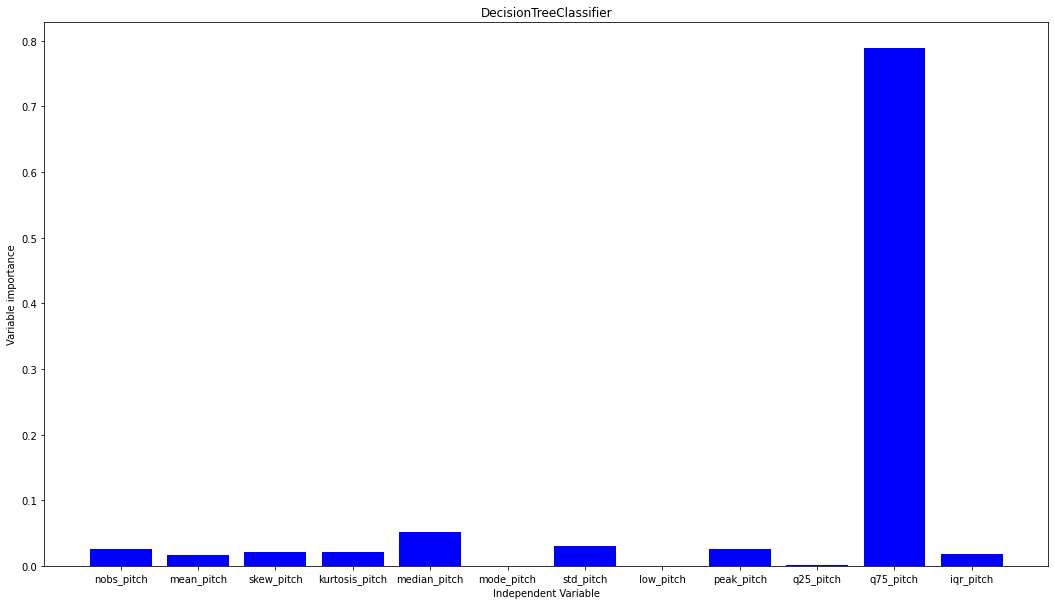

In [13]:
plot_feature_importances_mydata(tree,'blue')